In [1]:
!pip install multidict
!pip install -U spacy
!python -m spacy download fr_core_news_sm


     |████████████████████████████████| 160 kB 4.3 MB/s 
     |████████████████████████████████| 6.0 MB 4.2 MB/s 
     |████████████████████████████████| 451 kB 40.1 MB/s 
     |████████████████████████████████| 628 kB 45.6 MB/s 
     |████████████████████████████████| 10.1 MB 38.1 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 181 kB 43.2 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled s

In [2]:
!pip install spacy-langdetect

     |████████████████████████████████| 998 kB 5.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993430 sha256=b3ffde61d201089c6ac99de982425d073e6587bcb2a6fab85dac26811342c9e5
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect


In [3]:
# évidemment un truc marche pas en ce moment
!python -m spacy download fr_dep_news_trf

     |████████████████████████████████| 400.7 MB 24 kB/s 
     |████████████████████████████████| 1.2 MB 5.5 MB/s 
     |████████████████████████████████| 51 kB 148 kB/s 
     |████████████████████████████████| 1.1 MB 35.8 MB/s 
     |████████████████████████████████| 3.1 MB 38.3 MB/s 
     |████████████████████████████████| 3.3 MB 34.2 MB/s 
     |████████████████████████████████| 596 kB 39.2 MB/s 
     |████████████████████████████████| 61 kB 436 kB/s 
     |████████████████████████████████| 895 kB 36.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
✔ Download and installation successful
You can now load the package via spacy.load('fr_dep_news_trf')


In [ ]:
# https://github.com/explosion/spacy-models/releases/download/fr_dep_news_trf-3.2.0/fr_dep_news_trf-3.2.0-py3-none-any.whl

In [ ]:
# substitution sur une zone accessible
#!pip install http://ecmn-tln.fr/fr_dep_news_trf-3.2.0-py3-none-any.whl

----
## Ne pas oublier de relancer l'environnement
----

In [1]:
from google.colab import files

# Si le dossier est déjà monté dans l'environnement d'exécution, on passe
try:
  !git clone https://github.com/Patent2net/DistorsionCom.git
  os.chdir('DistorsionCom')
except:
  print("Dossier déjà monté, vous pouvez continuer l'exécution")

Cloning into 'DistorsionCom'...
remote: Enumerating objects: 257, done.
remote: Total 257 (delta 0), reused 0 (delta 0), pack-reused 257
Receiving objects: 100% (257/257), 41.76 MiB | 13.12 MiB/s, done.
Resolving deltas: 100% (92/92), done.
Dossier déjà monté, vous pouvez continuer l'exécution


In [2]:
import os
os.chdir("/content/DistorsionCom")
from outils import isPartner

In [3]:
stockageEntree = "/content/DistorsionCom/OUT"
stockageSortie = "/content/DistorsionCom/OUT"


---
Personnalisation

> Ces cellules permettent de réaliser les traitements à partir de son propre espace de stockage. A n'exécuter que dans ce cas en adaptant les dossiers d'entrée et sortie. NE PAS EXECUTER SAUF A VOULOIR PERSONNALISER LES TRAITEMENTS

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Récupérer les entrées sur son drive
stockageEntree = "/content/drive/MyDrive/OUT"

In [6]:
# Récupérer les sorties sur son drive (créer un dossier "OUT")
stockageSortie = "/content/drive/MyDrive/"

---

In [7]:
import multidict as multidict
import os, pickle, re, spacy
from os import path
from collections import Counter
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import pandas as pd
from urllib import parse


In [8]:
def get_lang_detector(nlp, name):
    return LanguageDetector()

In [9]:
# A ne pas lancer plusieurs fois !!
Language.factory("language_detector", func=get_lang_detector)

<function __main__.get_lang_detector>

---

# Les partenaires

> Les partenaires sont les sites cités par le site d'origine, citant eux-même le site. Les motivations de citation étant aussi variées que les motivations de partenariat nous tentons de regrouper ces partenaires selon les catégories identifiées.

Les sites des partenaires ont été identifiés par le logiciel Hyphe (Médialab)

Note: si l'url n'a pas été collecté dans la phase d'initialisation (scrapping) alors son champ lexical n'est pas utilisé

In [10]:
with open (stockageEntree + "/Ressources/NIVEAU1-PNPC.csv", "r") as partners:
  donnee= partners.readlines()

In [11]:
partenaires = []
for lig in donnee[1:]:
  urls = lig.split(";")[2]
  partenaires.extend(urls.split())

In [12]:
partenairesPropres = []

In [13]:
for url in partenaires:
  url = url.strip()
  url = url.replace('"', "")

  urlP = parse.urlparse(url)
  partenairesPropres.append(urlP.scheme + '://' + urlP.hostname)

## Chargements des traitements partenaires (II-c)

In [14]:
fichierDeSortie = stockageEntree + '/ContenusTraites/' + 'Partners.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  dicoEtiquettagePartners = pickle.load(fictemp)

In [15]:
fichierDeSortie = stockageSortie + 'OUT/ContenusTraites/' + "verbesSitesPartners.pkl"
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  verbesPartners = pickle.load(fictemp)

fichierDeSortie = stockageSortie + 'OUT/ContenusTraites/' + 'nomsSitesPartners.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  nomsPartners = pickle.load(fictemp)
fichierDeSortie = stockageSortie + 'OUT/ContenusTraites/' + 'adjectifsSitesPartners.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  adjectifsPartners = pickle.load(fictemp)

fichierDeSortie = stockageSortie + 'OUT/ContenusTraites/' + 'adverbesSitesPartners.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  adverbesPartners = pickle.load(fictemp)

In [16]:
dicoEtiquettagePartners.keys()

dict_keys(['http://fr-fr.facebook.com/pages', 'https://fr-fr.facebook.com/pages', 'http://alizee-soft.com', 'http://pyrenees-parcnational.fr', 'http://guadeloupe-parcnational.fr', 'http://calanques-parcnational.fr', 'http://ecrins-parcnational.fr', 'http://colleo.fr', 'http://cevennes-parcnational.fr', 'http://espritparcnationalportcros.com', 'https://espritparcnationalportcros.com', 'http://forets-parcnational.fr', 'http://ofb.gouv.fr', 'http://parcsnationaux.fr', 'http://portcrosparcnational.fr', 'http://mercantour.eu', 'http://reunion-parcnational.fr', 'http://parc-amazonien-guyane.fr', 'http://www.var.gouv.fr', 'http://vanoise-parcnational.fr', 'http://www.vanoise-parcnational.fr', 'https://vanoise-parcnational.fr', 'https://www.vanoise-parcnational.fr', 'http://espritparcnational.com', 'http://ac-nice.fr', 'http://premar-mediterranee.gouv.fr', 'http://hyeres-tourisme.com', 'http://festival-galathea.com', 'http://tlv-tvm.com', 'http://bateauxverts.com', 'http://www.bateauxverts.com

# Prétraitements 

## Détection de langue
> Les procédures de lemmatisation et autres fonctions TAL sont fonction de la langue. Seul le modèle FR est chargé. Les autres langues seront exclues.

In [18]:
  # deux modèles de données spacy sont utilisés du fait de leur efficacité relative à la détection des entités
    # 'fr_core_news_sm' fonctionne mieux pour la détection des entités
  tal = spacy.load('fr_core_news_sm')


In [19]:
tal.add_pipe('language_detector', last=True) # Permet de détecter la langue

In [20]:
aGarder, aVirer = dict([]), dict([])

In [ ]:
# modif au 30/11 :  rajout d'exclusion des partenaires (sauf catégories parcs)
for ndf in os.listdir(stockageEntree + "/ContenusSites/"):
  fichierEntree = stockageEntree + "/ContenusSites/" + ndf
  if not ndf.startswith('.') and "backlinks" not in ndf and 'stats' not in ndf and 'Partners'  not in ndf:
    with open (fichierEntree, 'rb') as  fictemp:
      soupe = pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    if ndf not in aVirer.keys():
      aVirer[ndf] = []
    if ndf not in aGarder.keys():
      aGarder[ndf] = []
    for url in soupe.keys():
      tousLesContenus = soupe [url] 
      doc = tal(str(tousLesContenus))
      if not doc._.language["language"] == "fr": # exclusion si fr non détecté
        print("pas fr (ou vide) : ", url, soupe [url] )
        aVirer[ndf].append(url)
      else:
        if ndf !='parcs' and not isPartner(url, partenaires+partenairesPropres):
          aGarder[ndf].append(url)
        elif ndf =='parcs':
          aGarder[ndf].append(url) # il faudrait probablement exclure le PNPC ici
        else:
          aVirer[ndf].append(url) # si c'est un partenaire il n'a rien à faire ici


In [22]:
fichierDeSortie = stockageSortie + '/OUT/Tempo/' +'vires.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(aVirer, fictemp)

fichierDeSortie = stockageSortie + '/OUT/Tempo/' +'gardes.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(aGarder, fictemp)

In [23]:
# pour éviter les traitements précédents
fichierDeSortie = stockageSortie + '/OUT/Tempo/' +'vires.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  aVirer = pickle.load(fictemp)

fichierDeSortie = stockageSortie + '/OUT/Tempo/' +'gardes.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  aGarder =pickle.load(fictemp)

# Supression des extrêmes


In [24]:
aGarderTemp, aVirerTemp = aGarder, aVirer



---


Ne pas exécuter la ligne ci-dessous. Sauvegarde temporaire pour ne pas avoir à rexécuter la précédente lors des tests.

In [25]:
aGarder, aVirer = aGarderTemp, aVirerTemp



---



In [26]:
# Excliusion du PNPC de la représentation des parcs
aVirer["parcs"] = "http://www.portcrosparcnational.fr/"

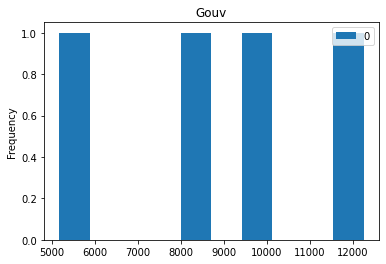

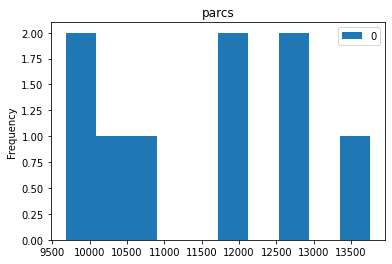

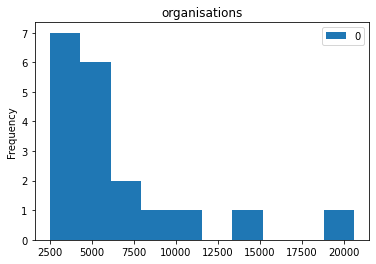

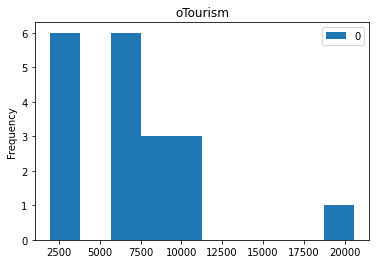

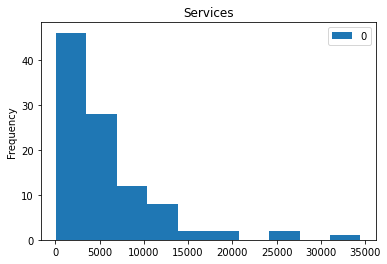

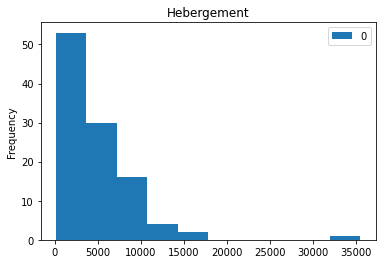

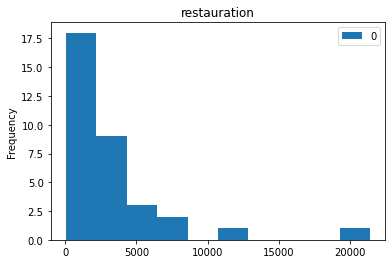

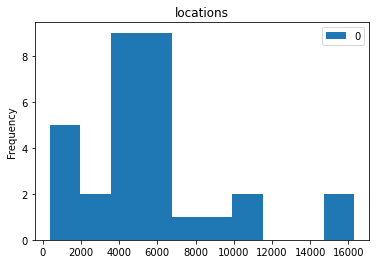

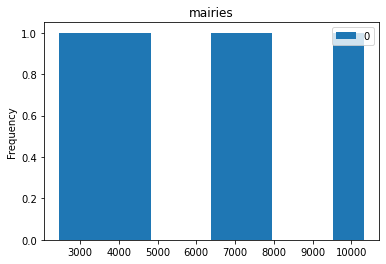

In [27]:
stats = dict()
for ndf in os.listdir(stockageEntree + "/ContenusSites/"):
  if not ndf.startswith('.')  and "backlinks" not in ndf and 'stats' not in ndf and 'Partners'  not in ndf:
    fichierEntree = stockageEntree + '/ContenusSites/' + ndf
    with open (fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soup=pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    index = list([url for url in soup.keys() if url not in aVirer[ndf] and url in aGarder[ndf]])

    data  = [len(soup[url]) for url in index ]
    donnees = pd.DataFrame.from_dict(data)
    donnees.index = index
    donnees.plot.hist(bins=10, title = ndf)
    stats [ndf]  = donnees.describe()


 # stats contient la description statistique des données fondée sur la taille
 # de celle-ci. Cette variable servira a exclure les url dont la variation
 # à la moyenne est trop importante : trop ou pas assez sont considérés comme
 # des singularités. Cela peut provenir de la forme choisie pour la page (grande
 # page qui contient "tout" avec un ascenceur interminable ou par ex. une page composée
 # par des appels url en js que le collecteur ne reconstruit pas) 

In [ ]:
stats [ndf][0]['mean']

8364.166666666666

In [28]:
# suppression des extrêmes
seuil = 0.95 # plus de deux fois autour de la moyenne pour le max
seuilBas = 500 # plancher ARBITRAIRE de 500 caractères au dessus
# le code qui suit sert à exclure les extrêmes (taille de collecte) hors zone 
# entre la valeur moyenne sur la collecte +/- sa valeur valeur multipliée par le seuil
# il ne faut pas réitérer la boucle plusieurs fois au risque de voir exclure tout le monde
# Si le seuil est modifié il faut ré-exécuter la cellule d'initialisation des statistiques

for ndf in os.listdir(stockageEntree + "/ContenusSites/"):
  if not ndf.startswith('.') and "backlinks" not in ndf and "stats" not in ndf and 'Partners' not in ndf:
    
    fichierEntree = stockageEntree +  '/ContenusSites/' +ndf
    with open (fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soup=pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    if ndf not in aGarder.keys():
      aGarder[ndf] = []
    if ndf not in aVirer.keys():
      aVirer[ndf] = []
    for url in soup.keys():
      # autour de la moyenne +/- sa valeur divisée par le seuil
      if (len(soup[url]) >  seuilBas) and (len(soup[url]) < stats[ndf][0]['mean'] + stats[ndf][0]['mean']//seuil):
          # print( len(soup [url]), stats [ndf] [0]['mean']/seuil)
          if url not in aGarder[ndf]:
            aGarder[ndf].append(url)
            if url in aVirer [ndf]:
              aVirer[ndf].remove(url)
          else:
            pass
      else:
        aVirer[ndf].append(url)
        if url in aGarder[ndf]:
          aGarder[ndf]. remove (url)
    print (ndf, "  ", stats[ndf][0]['count'], " exclus ", len(set(aVirer[ndf])))
    index = list([url for url in soup.keys() if url not in aVirer[ndf] and url in aGarder[ndf]])

    data  = [len(soup[url]) for url in aGarder[ndf] if url not in aVirer[ndf]]
    # mise à jour des stats
    
    donnees = pd.DataFrame.from_dict(data)
    donnees.index = index
    stats [ndf.replace('.pkl', '')] = donnees.describe()


Gouv    4.0  exclus  0
parcs    9.0  exclus  16
organisations    19.0  exclus  3
oTourism    19.0  exclus  2
Services    101.0  exclus  16
Hebergement    106.0  exclus  23
restauration    34.0  exclus  9
locations    31.0  exclus  6
mairies    6.0  exclus  1


In [29]:
print (aVirer["parcs"])

http://www.portcrosparcnational.fr/


In [ ]:
stats



---



# Traitement des fichiers produits par le scrapper
> ndf est le fichier produit par le scapper. On le charge le spacytraite pour visualiser

In [31]:
dicoEtiquettage = dict() # etiquettes par typologie de site
aEviter = dict()
verbes = dict() #listes à remplir avec verbes/adj/noms/entités trouvés 
adjectifs  = dict() 
noms = dict()
Etiquette  = dict() # etiquettes par typologie de site Et par site
adverbes = dict()
tempAdv = dict()

In [32]:
catGramm = dict()

In [33]:
  tal = spacy.load('fr_core_news_sm')
    # 'fr_dep_news_trf' fonctionne mieux pour le reste
  tal1 = spacy.load('fr_dep_news_trf', disable = ['tagger', "ner"])

In [ ]:
#import warnings



In [34]:
cats = ["VERB", "ADJ", "ADV", "NOUN"]
Done = list(catGramm .keys())

for ndf in os.listdir(stockageEntree + "/ContenusSites/"):
  fichierEntree = stockageEntree + '/ContenusSites/' + ndf
  if (not ndf.startswith('.')) and (ndf not in Done) and ("backlinks" not in ndf) and ("stats" not in ndf) and ('Partners' not in ndf):
    # chargement des données collectées par le scrapeur
    with open (fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soupe=pickle.load(fictemp)
    ndf = ndf.replace('.pkl', '')
    dicoEtiquettage[ndf], Etiquette [ndf] = dict(), dict()
    # nettoyage
    tousLesContenus = """""" # une longue chaine qui contiendra tous les contenus des sites de la ndf
    #with warnings.catch_warnings(record=True) as w:
     # warnings.simplefilter('always') n'arrive pas a capturer l'erreur de token
    for url in aGarder[ndf]:
      tousLesContenus = soupe[url] 
      doc = tal(tousLesContenus)
      Etiquette [ndf][url] = dict()
        # Si l'environnement n'a pas été redémarré, le code plante ici
        #extraction des entités
      entites = []
      for entity in doc.ents:
        if entity.label_ not in Etiquette [ndf][url].keys():
          Etiquette [ndf][url][entity.label_] = [entity.text]
        else:
          Etiquette [ndf][url][entity.label_].append(entity.text)
        
            #entites.append(entity.text)
            #dicoEtiquettage [ndf] [entity.label_] = entites #dico: [étiquettage de entité donné par spacy] = la liste des entités
      if ndf not in aEviter.keys():
        aEviter[ndf] = dict()
        aEviter[ndf][url] =[]
      if url not in aEviter[ndf] .keys():
        aEviter[ndf][url] =[]
      for catego in ['LOC', 'MISC', 'PER', 'ORG']:
        if catego in Etiquette [ndf][url].keys():
          aEviter[ndf][url] += Etiquette [ndf][url][catego] # toutes les formes lexicale que l'on esquivera
          
      # utilisation de l'autre modèle
      doc = tal1(tousLesContenus)



      machin = [(truc.lemma_, truc.pos_) for truc in doc if truc.text not in aEviter[ndf][url] and truc.text.lower() not in aEviter[ndf][url] and truc.pos_ in cats]
      for truc in machin:
        if truc[1] in Etiquette [ndf][url] .keys():
          Etiquette [ndf][url][truc[1]] .append(truc [0])
        else:
          Etiquette [ndf][url][truc[1]] = [truc [0]]
      
    # Assemblage de toutes les mots etiquettés dans dicoEtiquettage
    for url in Etiquette [ndf].keys():
      for catG in Etiquette [ndf][url].keys():
        if catG in dicoEtiquettage[ndf] .keys():
          dicoEtiquettage[ndf][catG] .extend (Etiquette [ndf][url][catG])
        else:
          dicoEtiquettage[ndf][catG] = Etiquette [ndf][url][catG]

       # if len(w):
        #  if 'Token' in str(w[0].message) or "sequence length" in str(w[0].message):
        #    print (w[0].category, w[0].message, ndf)
        #    break
        #  elif 'cuda' in str(w[0].message):
        #    pass
        #  elif 'Token' in str(Warning):
        #      break
        #  else:
        #      break


    catGramm [ndf] = dict()

    for cle in dicoEtiquettage[ndf] .keys(): 
      catGramm [ndf][cle] = Counter(dicoEtiquettage[ndf][cle])
    
    Done.append(ndf)

Token indices sequence length is longer than the specified maximum sequence length for this model (794 > 512). Running this sequence through the model will result in indexing errors


In [35]:
ndf

'mairies'

In [36]:
tousLesContenus

'Ville de La Garde - Heureuse et solidaire           Accueil  Aller au contenu  Menu principal  Menu secondaire  Pied de page  Aide                             MENU MENU Ma Mairie   Les élus   Demande de rendez-vous avec M. le Maire   Commissions extra-municipales     Publications municipales Conseil municipal         Accéder la F.P.T. Annuaires     Services municipaux     Vos démarches       Rendez-vous avec M. le Maire   Marchés publics     Conseil ville des enfants     Archives municipales     Le Budget  Ma Ville   Découvrez La Garde             Economie et Emploi         Circulation – Stationnement     Urbanisme – P.L.U.         Logements     Industrie – Artisanat – Commerces     Environnement – Développement durable             Sécurité     Enseignement supérieur et recherche     Déploiement fibre  Ma Famille   Espace citoyens Petite enfance (0-3 ans)     Programme réussite éducative Le C.C.A.S.     Enfance (3-10 ans)             Ville amie des enfants Jeunesse (9-25 ans)         

In [37]:
url

'http://ville-lagarde.fr'

In [38]:
for ndf in Etiquette.keys():
  if ndf not in verbes.keys():
    verbes[ndf] = []      
  if ndf not in adjectifs.keys():
    adjectifs[ndf] = []
  if ndf not in noms.keys():
    noms[ndf] = []       
  if ndf not in adverbes.keys(): #ADVERBES
    adverbes[ndf] = []
  for url in Etiquette [ndf] .keys():
    if "VERB" in Etiquette [ndf][url] .keys(): # je conserve la truc peu heureuse... peut être réalisé post traitements....
      verbes[ndf] +=Etiquette [ndf][url]["VERB"]
    if "NOUN" in Etiquette [ndf][url] .keys():
      noms[ndf] += Etiquette [ndf][url]["NOUN"]
    if "ADV" in Etiquette [ndf][url] .keys():
      adverbes[ndf] += Etiquette [ndf][url]["ADV"]
    if "ADJ" in Etiquette [ndf][url] .keys():
      adjectifs[ndf] += Etiquette [ndf][url]["ADJ"]

In [39]:
catGramm .keys()

dict_keys(['Gouv', 'parcs', 'organisations', 'oTourism', 'Services', 'Hebergement', 'restauration', 'locations', 'mairies'])

In [40]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +"verbesSites.pkl"
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(verbes, fictemp)

fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'nomsSites.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(noms, fictemp)

fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'adjectifsSites.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(adjectifs, fictemp)

fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'adverbesSites.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(adverbes, fictemp)

In [41]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'Etiquettes.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(Etiquette, fictemp)

In [42]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'spacySites.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(dicoEtiquettage, fictemp)

In [43]:
fichierDeSortie = stockageSortie + '/OUT/ContenusTraites/' +'catGrammSites.pkl'
with open (fichierDeSortie, 'wb') as  fictemp: #on met tous les contenus dans pickle
  pickle.dump(catGramm, fictemp)

# Tests des représentations

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from urllib import parse


def makeImage(text):
    wc = WordCloud(background_color="white", max_words=100,width=800, height=400)
    wc.generate_from_frequencies(text)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [45]:
temp = ["veuillez preservation pizzas mimosas découvrez venez jouez visitez écoutez lisez" ]

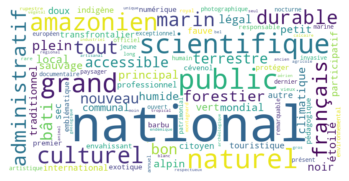

In [46]:
makeImage(catGramm['parcs'] ['ADJ'])

In [ ]:
import pickle

In [ ]:
fichierDeSortie = stockageSortie + '/ContenusTraites/' +'Partners.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  dicoEtiquettagePartners = pickle.load(fictemp)

In [53]:
import json
fichierDeSortie = stockageSortie + 'OUT/JSON/' +'ListePartners.json'
with open(fichierDeSortie, 'w', encoding='utf-8') as f:
    json.dump(list(dicoEtiquettagePartners .keys()),f )

In [49]:
[cle for cle in  dicoEtiquettagePartners.keys() if "portcros" in cle]

['http://espritparcnationalportcros.com',
 'https://espritparcnationalportcros.com',
 'http://portcrosparcnational.fr']

In [ ]:
stats

In [52]:
import json
fichierDeSortie = stockageSortie + 'OUT/JSON/' +'ContenusPartners.json'
with open(fichierDeSortie, 'w', encoding='utf-8') as f:
    json.dump(dicoEtiquettagePartners,f )